In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif as MIC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix

In [2]:
# get data in a dataframe and read it
churn_data=pd.read_csv('/content/drive/MyDrive/Datasets/Databel - Data.csv')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
#copy data in another dataframe
copy_churn_data=churn_data.copy()

In [5]:
# show data
copy_churn_data.head()

Customer ID Churn Label  Account Length (in months)  Local Calls  \
0   4444-BZPU          No                           1            3   
1   5676-PTZX          No                          33          179   
2   8532-ZEKQ          No                          44           82   
3   1314-SMPJ          No                          10           47   
4   2956-TXCJ          No                          62          184   

   Local Mins  Intl Calls  Intl Mins Intl Active Intl Plan  \
0         8.0         0.0        0.0          No        no   
1       431.3         0.0        0.0          No        no   
2       217.6         0.0        0.0          No       yes   
3       111.6        60.0       71.0         Yes       yes   
4       621.2       310.0      694.4         Yes       yes   

   Extra International Charges  Customer Service Calls  \
0                          0.0                       0   
1                          0.0                       0   
2                          0.0                       0   
3                          0.0                       0   
4                          0.0                       0   

   Avg Monthly GB Download Unlimited Data Plan  Extra Data Charges State  \
0                        3                 Yes                   0    KS   
1                        3                 Yes                   0    OH   
2                        3                 Yes                   0    OH   
3                        2                 Yes                   0    MO   
4                        3                 Yes                   0    WV   

  Phone Number  Gender  Age Under 30 Senior Group  \
0     382-4657  Female   35       No     No    No   
1     371-7191    Male   49       No     No    No   
2     375-9999    Male   51       No     No    No   
3     329-9001  Female   41       No     No    No   
4     330-8173    Male   51       No     No    No   

   Number of Customers in Group Device Protection & Online Backup  \
0                             0                                No   
1                             0                               Yes   
2                             0                               Yes   
3                             0                                No   
4                             0                                No   

    Contract Type Payment Method  Monthly Charge  Total Charges  \
0  Month-to-Month   Direct Debit              10             10   
1        One Year    Paper Check              21            703   
2        One Year   Direct Debit              23           1014   
3  Month-to-Month    Paper Check              17            177   
4        One Year   Direct Debit              28           1720   

  Churn Category Churn Reason  
0            NaN          NaN  
1            NaN          NaN  
2            NaN          NaN  
3            NaN          NaN  
4            NaN          NaN

In [6]:
#describe data
copy_churn_data.describe()

Account Length (in months)  Local Calls   Local Mins   Intl Calls  \
count                 6687.000000  6687.000000  6687.000000  6687.000000   
mean                    32.337820   130.974129   322.752864    51.097524   
std                     24.595689   121.893966   288.619931   103.592369   
min                      1.000000     1.000000     4.000000     0.000000   
25%                      9.000000    31.000000    76.900000     0.000000   
50%                     29.000000    98.000000   250.500000     0.000000   
75%                     55.000000   199.000000   498.050000    52.000000   
max                     77.000000   918.000000  1234.200000  1120.000000   

         Intl Mins  Extra International Charges  Customer Service Calls  \
count  6687.000000                  6687.000000             6687.000000   
mean    130.070624                    33.641783                0.915657   
std     243.527828                    76.346828                1.411484   
min       0.000000                     0.000000                0.000000   
25%       0.000000                     0.000000                0.000000   
50%       0.000000                     0.000000                0.000000   
75%     140.400000                    16.400000                2.000000   
max    1372.500000                   585.800000                5.000000   

       Avg Monthly GB Download  Extra Data Charges          Age  \
count              6687.000000         6687.000000  6687.000000   
mean                  6.696276            3.374458    47.448632   
std                   7.454339           12.565309    16.969893   
min                   0.000000            0.000000    19.000000   
25%                   1.000000            0.000000    33.000000   
50%                   5.000000            0.000000    47.000000   
75%                   9.000000            0.000000    60.000000   
max                  43.000000           99.000000    85.000000   

       Number of Customers in Group  Monthly Charge  Total Charges  
count                   6687.000000     6687.000000    6687.000000  
mean                       0.837894       31.030357    1083.755645  
std                        1.700780       16.288147    1127.074863  
min                        0.000000        5.000000       6.000000  
25%                        0.000000       16.000000     181.000000  
50%                        0.000000       31.000000     647.000000  
75%                        0.000000       43.000000    1732.500000  
max                        6.000000       78.000000    5574.000000

In [7]:
#know information about data
copy_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6687 entries, 0 to 6686
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        6687 non-null   object 
 1   Churn Label                        6687 non-null   object 
 2   Account Length (in months)         6687 non-null   int64  
 3   Local Calls                        6687 non-null   int64  
 4   Local Mins                         6687 non-null   float64
 5   Intl Calls                         6687 non-null   float64
 6   Intl Mins                          6687 non-null   float64
 7   Intl Active                        6687 non-null   object 
 8   Intl Plan                          6687 non-null   object 
 9   Extra International Charges        6687 non-null   float64
 10  Customer Service Calls             6687 non-null   int64  
 11  Avg Monthly GB Download            6687 non-null   int64

In [8]:
#check duplicates in the dataframe as a whole
copy_churn_data.duplicated().sum()

0

In [9]:
# get total local calls
copy_churn_data['Local Calls'].sum()

875824

In [10]:
#check null values
copy_churn_data.isnull().sum()

Customer ID                             0
Churn Label                             0
Account Length (in months)              0
Local Calls                             0
Local Mins                              0
Intl Calls                              0
Intl Mins                               0
Intl Active                             0
Intl Plan                               0
Extra International Charges             0
Customer Service Calls                  0
Avg Monthly GB Download                 0
Unlimited Data Plan                     0
Extra Data Charges                      0
State                                   0
Phone Number                            0
Gender                                  0
Age                                     0
Under 30                                0
Senior                                  0
Group                                   0
Number of Customers in Group            0
Device Protection & Online Backup       0
Contract Type                     

In [11]:
# Replace null value in churn reason with "still existed" as he/she doen't leave"
copy_churn_data['Churn Reason'] = np.where((copy_churn_data['Churn Label'] == 'No') & (copy_churn_data['Churn Reason'].isnull()),'still existed',copy_churn_data['Churn Reason'])

In [12]:
# Replace null value in churn category with "still existed" as he/she doen't leave"
copy_churn_data['Churn Category'] = np.where((copy_churn_data['Churn Label'] == 'No') & (copy_churn_data['Churn Category'].isnull()),'still existed',copy_churn_data['Churn Category'])

In [13]:
#Replace null value in churn Reason with "No Reason" as he/she left and there's no reason mentioned"
copy_churn_data['Churn Reason'] = np.where((copy_churn_data['Churn Label'] == 'Yes') & (copy_churn_data['Churn Reason'].isnull()),'No Reason',copy_churn_data['Churn Reason'])

In [14]:
#Replace null value in churn Category with "No Reason" as he/she left and there's no reason mentioned"
copy_churn_data['Churn Category'] = np.where((copy_churn_data['Churn Label'] == 'Yes') & (copy_churn_data['Churn Category'].isnull()),'No Reason',copy_churn_data['Churn Category'])

In [15]:
#check Churn Category
copy_churn_data['Churn Category'].value_counts()

still existed      4891
Competitor          805
Attitude            287
Dissatisfaction     286
Price               200
Other               191
No Reason            27
Name: Churn Category, dtype: int64

In [16]:
# check Churn Reason
copy_churn_data['Churn Reason'].value_counts()

still existed                                4891
Competitor made better offer                  303
Competitor had better devices                 297
Attitude of support person                    203
Don't know                                    123
Competitor offered more data                  110
Competitor offered higher download speeds      95
Attitude of service provider                   84
Price too high                                 74
Product dissatisfaction                        73
Network reliability                            69
Long distance charges                          61
Service dissatisfaction                        60
Moved                                          44
Extra data charges                             37
Limited range of services                      35
Poor expertise of online support               30
Lack of affordable download/upload speed       28
No Reason                                      27
Lack of self-service on Website                26


In [17]:
#save churn customer in another dataframe for analyzing
churned_people=copy_churn_data[copy_churn_data['Churn Label']=='Yes']

In [18]:
#check count of churn customer
churned_people['Churn Label'].count()

1796

In [19]:
#check count of churn category for churn customer
churned_people['Churn Category'].value_counts()

Competitor         805
Attitude           287
Dissatisfaction    286
Price              200
Other              191
No Reason           27
Name: Churn Category, dtype: int64

In [20]:
#check count of churn reason for churn customer
churned_people['Churn Reason'].value_counts()

Competitor made better offer                 303
Competitor had better devices                297
Attitude of support person                   203
Don't know                                   123
Competitor offered more data                 110
Competitor offered higher download speeds     95
Attitude of service provider                  84
Price too high                                74
Product dissatisfaction                       73
Network reliability                           69
Long distance charges                         61
Service dissatisfaction                       60
Moved                                         44
Extra data charges                            37
Limited range of services                     35
Poor expertise of online support              30
Lack of affordable download/upload speed      28
No Reason                                     27
Lack of self-service on Website               26
Poor expertise of phone support               11
Deceased            

In [21]:
#check null values
churned_people.isnull().sum()

Customer ID                          0
Churn Label                          0
Account Length (in months)           0
Local Calls                          0
Local Mins                           0
Intl Calls                           0
Intl Mins                            0
Intl Active                          0
Intl Plan                            0
Extra International Charges          0
Customer Service Calls               0
Avg Monthly GB Download              0
Unlimited Data Plan                  0
Extra Data Charges                   0
State                                0
Phone Number                         0
Gender                               0
Age                                  0
Under 30                             0
Senior                               0
Group                                0
Number of Customers in Group         0
Device Protection & Online Backup    0
Contract Type                        0
Payment Method                       0
Monthly Charge           

In [22]:
#describe data for churn customers dataframe
churned_people.describe()

Account Length (in months)  Local Calls   Local Mins   Intl Calls  \
count                 1796.000000  1796.000000  1796.000000  1796.000000   
mean                    18.071269    74.198218   182.373163    35.320792   
std                     19.565686    92.677947   221.993187    70.716368   
min                      1.000000     1.000000     4.000000     0.000000   
25%                      2.000000     8.000000    19.300000     0.000000   
50%                     10.000000    35.500000    89.350000     0.000000   
75%                     29.000000   105.000000   261.325000    32.560125   
max                     74.000000   530.000000  1116.700000   702.000000   

         Intl Mins  Extra International Charges  Customer Service Calls  \
count  1796.000000                  1796.000000             1796.000000   
mean     95.754711                    31.160078                2.395880   
std     185.997393                    60.308319                1.745592   
min       0.000000                     0.000000                0.000000   
25%       0.000000                     0.000000                1.000000   
50%       0.000000                     2.800000                2.000000   
75%      94.425000                    30.525000                4.000000   
max    1161.800000                   426.200000                5.000000   

       Avg Monthly GB Download  Extra Data Charges          Age  \
count              1796.000000         1796.000000  1796.000000   
mean                  7.187639            3.482739    50.459354   
std                   6.736082           12.307356    17.853256   
min                   0.000000            0.000000    19.000000   
25%                   3.000000            0.000000    35.000000   
50%                   5.000000            0.000000    50.000000   
75%                  10.000000            0.000000    66.000000   
max                  43.000000           90.000000    85.000000   

       Number of Customers in Group  Monthly Charge  Total Charges  
count                   1796.000000     1796.000000    1796.000000  
mean                       0.202673       36.800668     761.422606  
std                        0.908710       14.578166     971.073356  
min                        0.000000        6.000000       6.000000  
25%                        0.000000       27.000000      60.750000  
50%                        0.000000       37.000000     340.000000  
75%                        0.000000       47.000000    1103.250000  
max                        6.000000       73.000000    5172.000000

In [24]:
#split features into 2 lists (numerical features and categorical features)
numerical_features = churned_people.select_dtypes(include=np.number).columns.tolist()

categorical_features = churned_people.select_dtypes(include='object').columns.tolist()

In [25]:
numerical_features

['Account Length (in months)',
 'Local Calls',
 'Local Mins',
 'Intl Calls',
 'Intl Mins',
 'Extra International Charges',
 'Customer Service Calls',
 'Avg Monthly GB Download',
 'Extra Data Charges',
 'Age',
 'Number of Customers in Group',
 'Monthly Charge',
 'Total Charges']

In [26]:
categorical_features

['Customer ID',
 'Churn Label',
 'Intl Active',
 'Intl Plan',
 'Unlimited Data Plan',
 'State',
 'Phone Number',
 'Gender',
 'Under 30',
 'Senior',
 'Group',
 'Device Protection & Online Backup',
 'Contract Type',
 'Payment Method',
 'Churn Category',
 'Churn Reason']

In [27]:
# present distribution of local calls and international calls
fig = px.box(churned_people[["Local Calls", "Intl Calls"]], title='Local & International Calls distribution')
fig.show()

In [28]:
# get total Extra International Charges for whom doesn't belong in group
copy_churn_data[copy_churn_data['Group']=='No']['Extra International Charges'].sum()

167681.0

In [29]:
# present the distribution of number of Customers in Group per contract type
fig = px.box(churned_people, x="Number of Customers in Group", y="Extra International Charges", color="Contract Type",title='The distribution Number of Customers in Group per contract type')
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

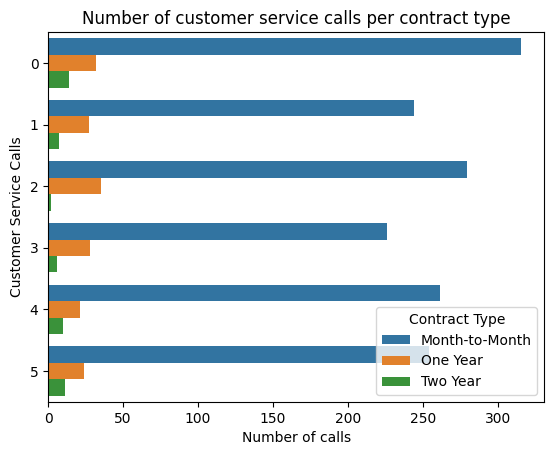

In [30]:
# present the distribution of number of Customers in Group per contract type
sns.countplot(churned_people, y='Customer Service Calls', hue="Contract Type")
plt.title('Number of customer service calls per contract type')
plt.xlabel('Number of calls')
plt.show()


In [31]:
# present churn reasons (churn category)
fig = px.histogram(churned_people, x='Churn Category',title='Why do people churn?')
fig.show()

In [32]:
# present churn reasons (churn reasons)
fig = px.histogram(churned_people, x='Churn Reason',title='Why do people churn?')
fig.show()

In [33]:
#present state that is the highest state among other states for customer churn?
fig = px.histogram(churned_people, x='State',title='Which state is the highest state among other states for customer churn?')
fig.show()

In [34]:
# present payment method that is the highest payment for customer churn
fig = px.histogram(churned_people, x='Payment Method',color='Contract Type',title='Which payment method is the highest payment for customer churn ?')
fig.show()

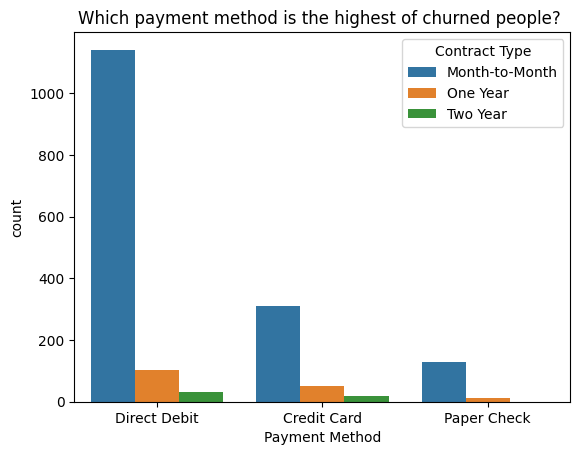

In [35]:
# present payment method that is the highest payment for customer churn
sns.countplot(churned_people, x='Payment Method', hue='Contract Type')
plt.title('Which payment method is the highest of churned people? ')
plt.show()

In [36]:
#present unlimited Plan Per Contract Type
fig = px.histogram(churned_people, x='Unlimited Data Plan',color='Contract Type', title='Unlimited Plan Per Contract Type')
fig.show()

In [37]:
#present customer number in the main dataframe
def y_churn(U):
  if U=='Yes':
    return 1
  elif U=='No':
    return 0
copy_churn_data['Churn Label']=copy_churn_data['Churn Label'].apply(y_churn)

In [39]:
#present count of Churn Label(Yes, No)
copy_churn_data['Churn Label'].value_counts()

0    4891
1    1796
Name: Churn Label, dtype: int64

In [40]:
#present data in the main dataframe
copy_churn_data.head()

Customer ID  Churn Label  Account Length (in months)  Local Calls  \
0   4444-BZPU            0                           1            3   
1   5676-PTZX            0                          33          179   
2   8532-ZEKQ            0                          44           82   
3   1314-SMPJ            0                          10           47   
4   2956-TXCJ            0                          62          184   

   Local Mins  Intl Calls  Intl Mins Intl Active Intl Plan  \
0         8.0         0.0        0.0          No        no   
1       431.3         0.0        0.0          No        no   
2       217.6         0.0        0.0          No       yes   
3       111.6        60.0       71.0         Yes       yes   
4       621.2       310.0      694.4         Yes       yes   

   Extra International Charges  Customer Service Calls  \
0                          0.0                       0   
1                          0.0                       0   
2                          0.0                       0   
3                          0.0                       0   
4                          0.0                       0   

   Avg Monthly GB Download Unlimited Data Plan  Extra Data Charges State  \
0                        3                 Yes                   0    KS   
1                        3                 Yes                   0    OH   
2                        3                 Yes                   0    OH   
3                        2                 Yes                   0    MO   
4                        3                 Yes                   0    WV   

  Phone Number  Gender  Age Under 30 Senior Group  \
0     382-4657  Female   35       No     No    No   
1     371-7191    Male   49       No     No    No   
2     375-9999    Male   51       No     No    No   
3     329-9001  Female   41       No     No    No   
4     330-8173    Male   51       No     No    No   

   Number of Customers in Group Device Protection & Online Backup  \
0                             0                                No   
1                             0                               Yes   
2                             0                               Yes   
3                             0                                No   
4                             0                                No   

    Contract Type Payment Method  Monthly Charge  Total Charges  \
0  Month-to-Month   Direct Debit              10             10   
1        One Year    Paper Check              21            703   
2        One Year   Direct Debit              23           1014   
3  Month-to-Month    Paper Check              17            177   
4        One Year   Direct Debit              28           1720   

  Churn Category   Churn Reason  
0  still existed  still existed  
1  still existed  still existed  
2  still existed  still existed  
3  still existed  still existed  
4  still existed  still existed

In [41]:
#split features into 2 lists (numerical features and categorical features)
numerical_features1 = copy_churn_data.select_dtypes(include=np.number).columns.tolist()

categorical_features1 = copy_churn_data.select_dtypes(include='object').columns.tolist()

In [42]:
numerical_features1

['Churn Label',
 'Account Length (in months)',
 'Local Calls',
 'Local Mins',
 'Intl Calls',
 'Intl Mins',
 'Extra International Charges',
 'Customer Service Calls',
 'Avg Monthly GB Download',
 'Extra Data Charges',
 'Age',
 'Number of Customers in Group',
 'Monthly Charge',
 'Total Charges']

In [43]:
categorical_features1

['Customer ID',
 'Intl Active',
 'Intl Plan',
 'Unlimited Data Plan',
 'State',
 'Phone Number',
 'Gender',
 'Under 30',
 'Senior',
 'Group',
 'Device Protection & Online Backup',
 'Contract Type',
 'Payment Method',
 'Churn Category',
 'Churn Reason']

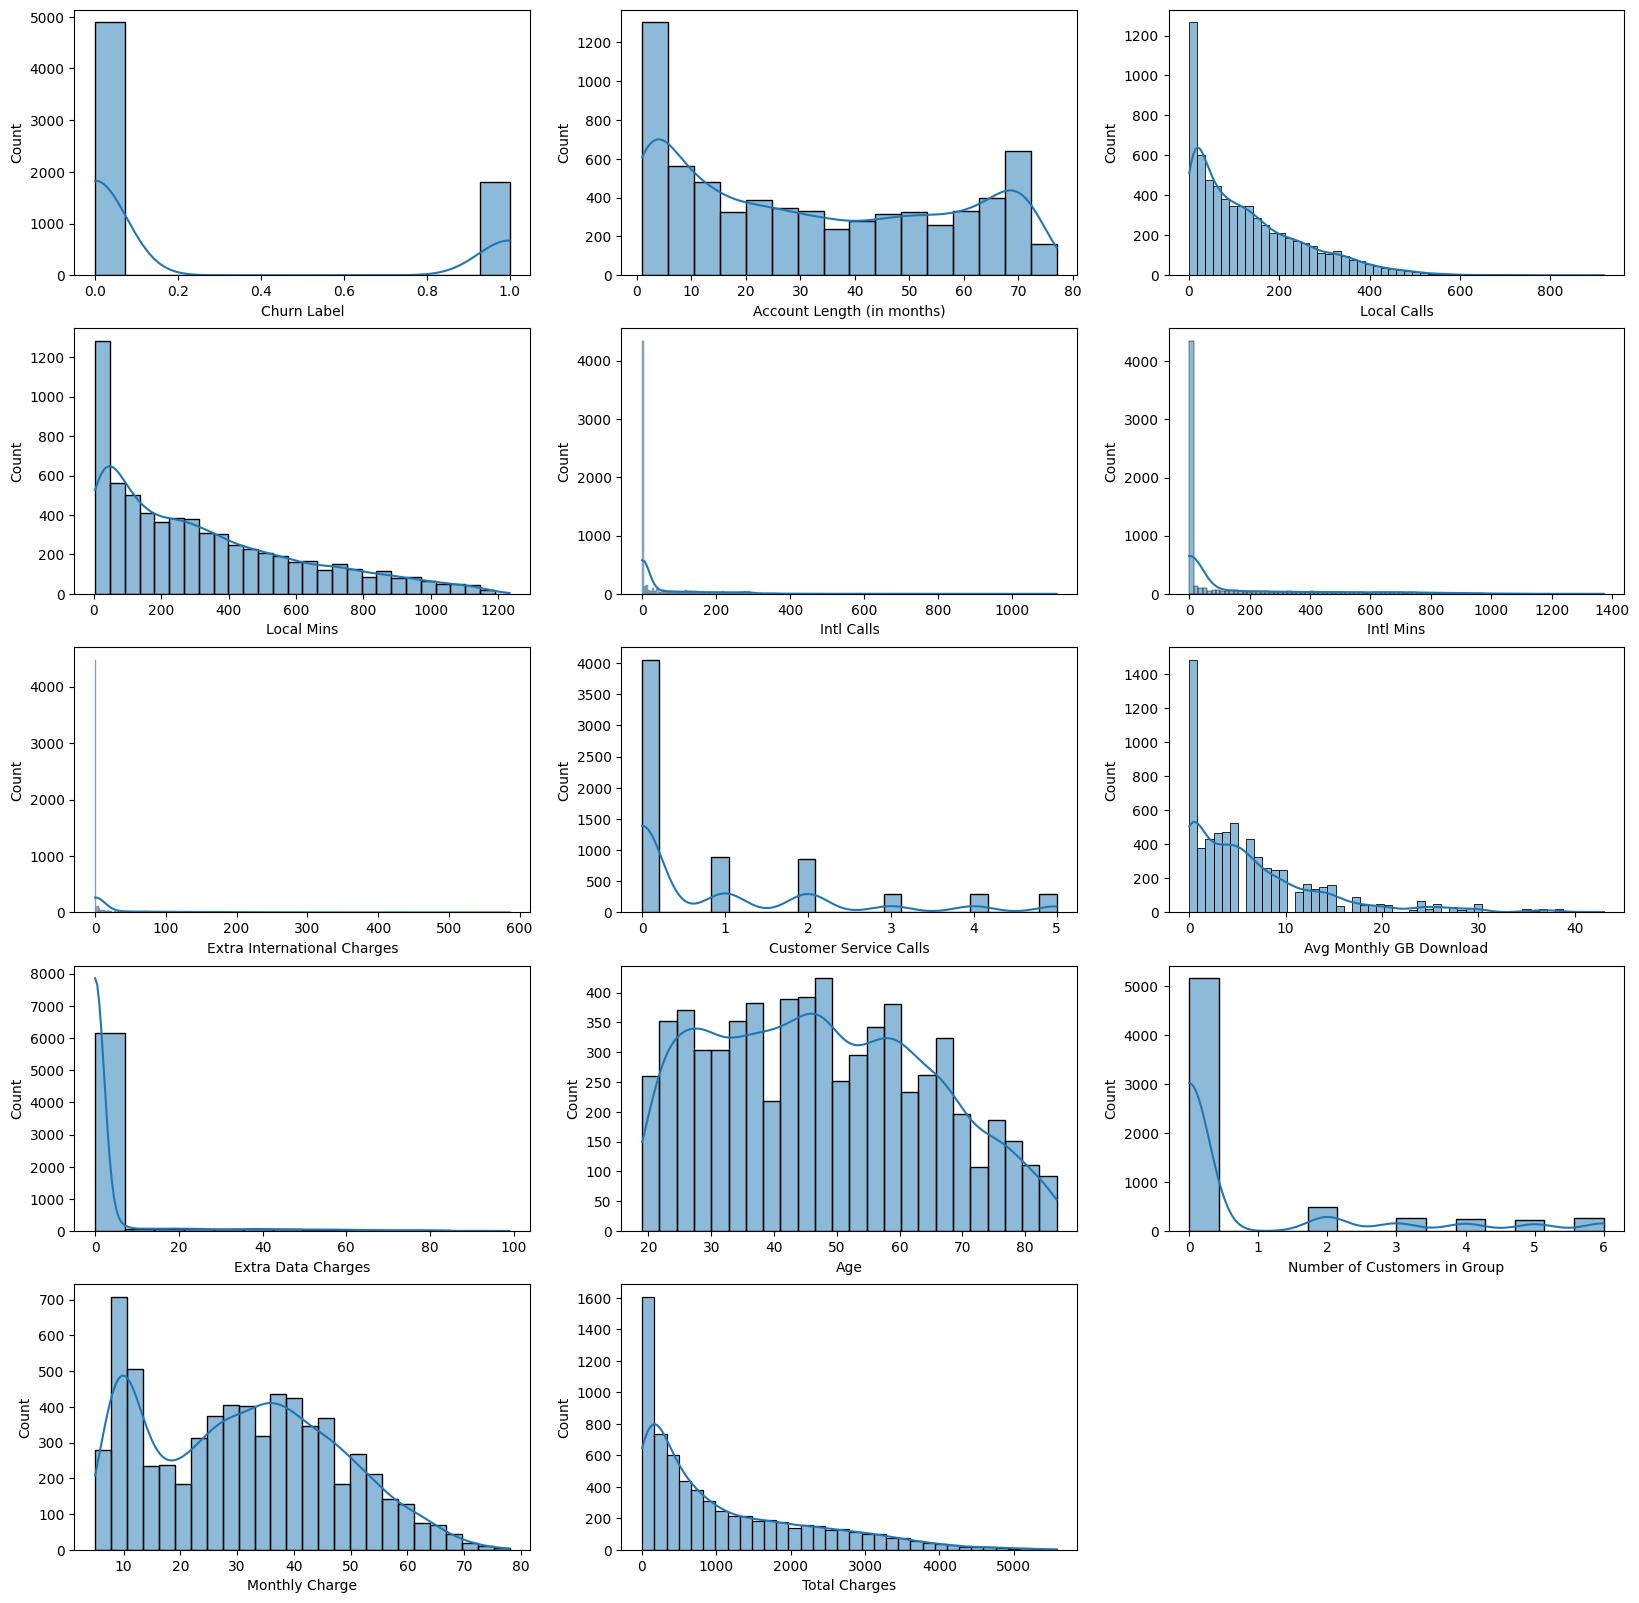

In [44]:
#draw histogram of numerical features (data distribution of numerical features)
k=1
plt.figure(figsize=(20,20))


for feature in numerical_features1:
    plt.subplot(5,3,k)
    sns.histplot(copy_churn_data[feature], kde=True)
    k=k+1


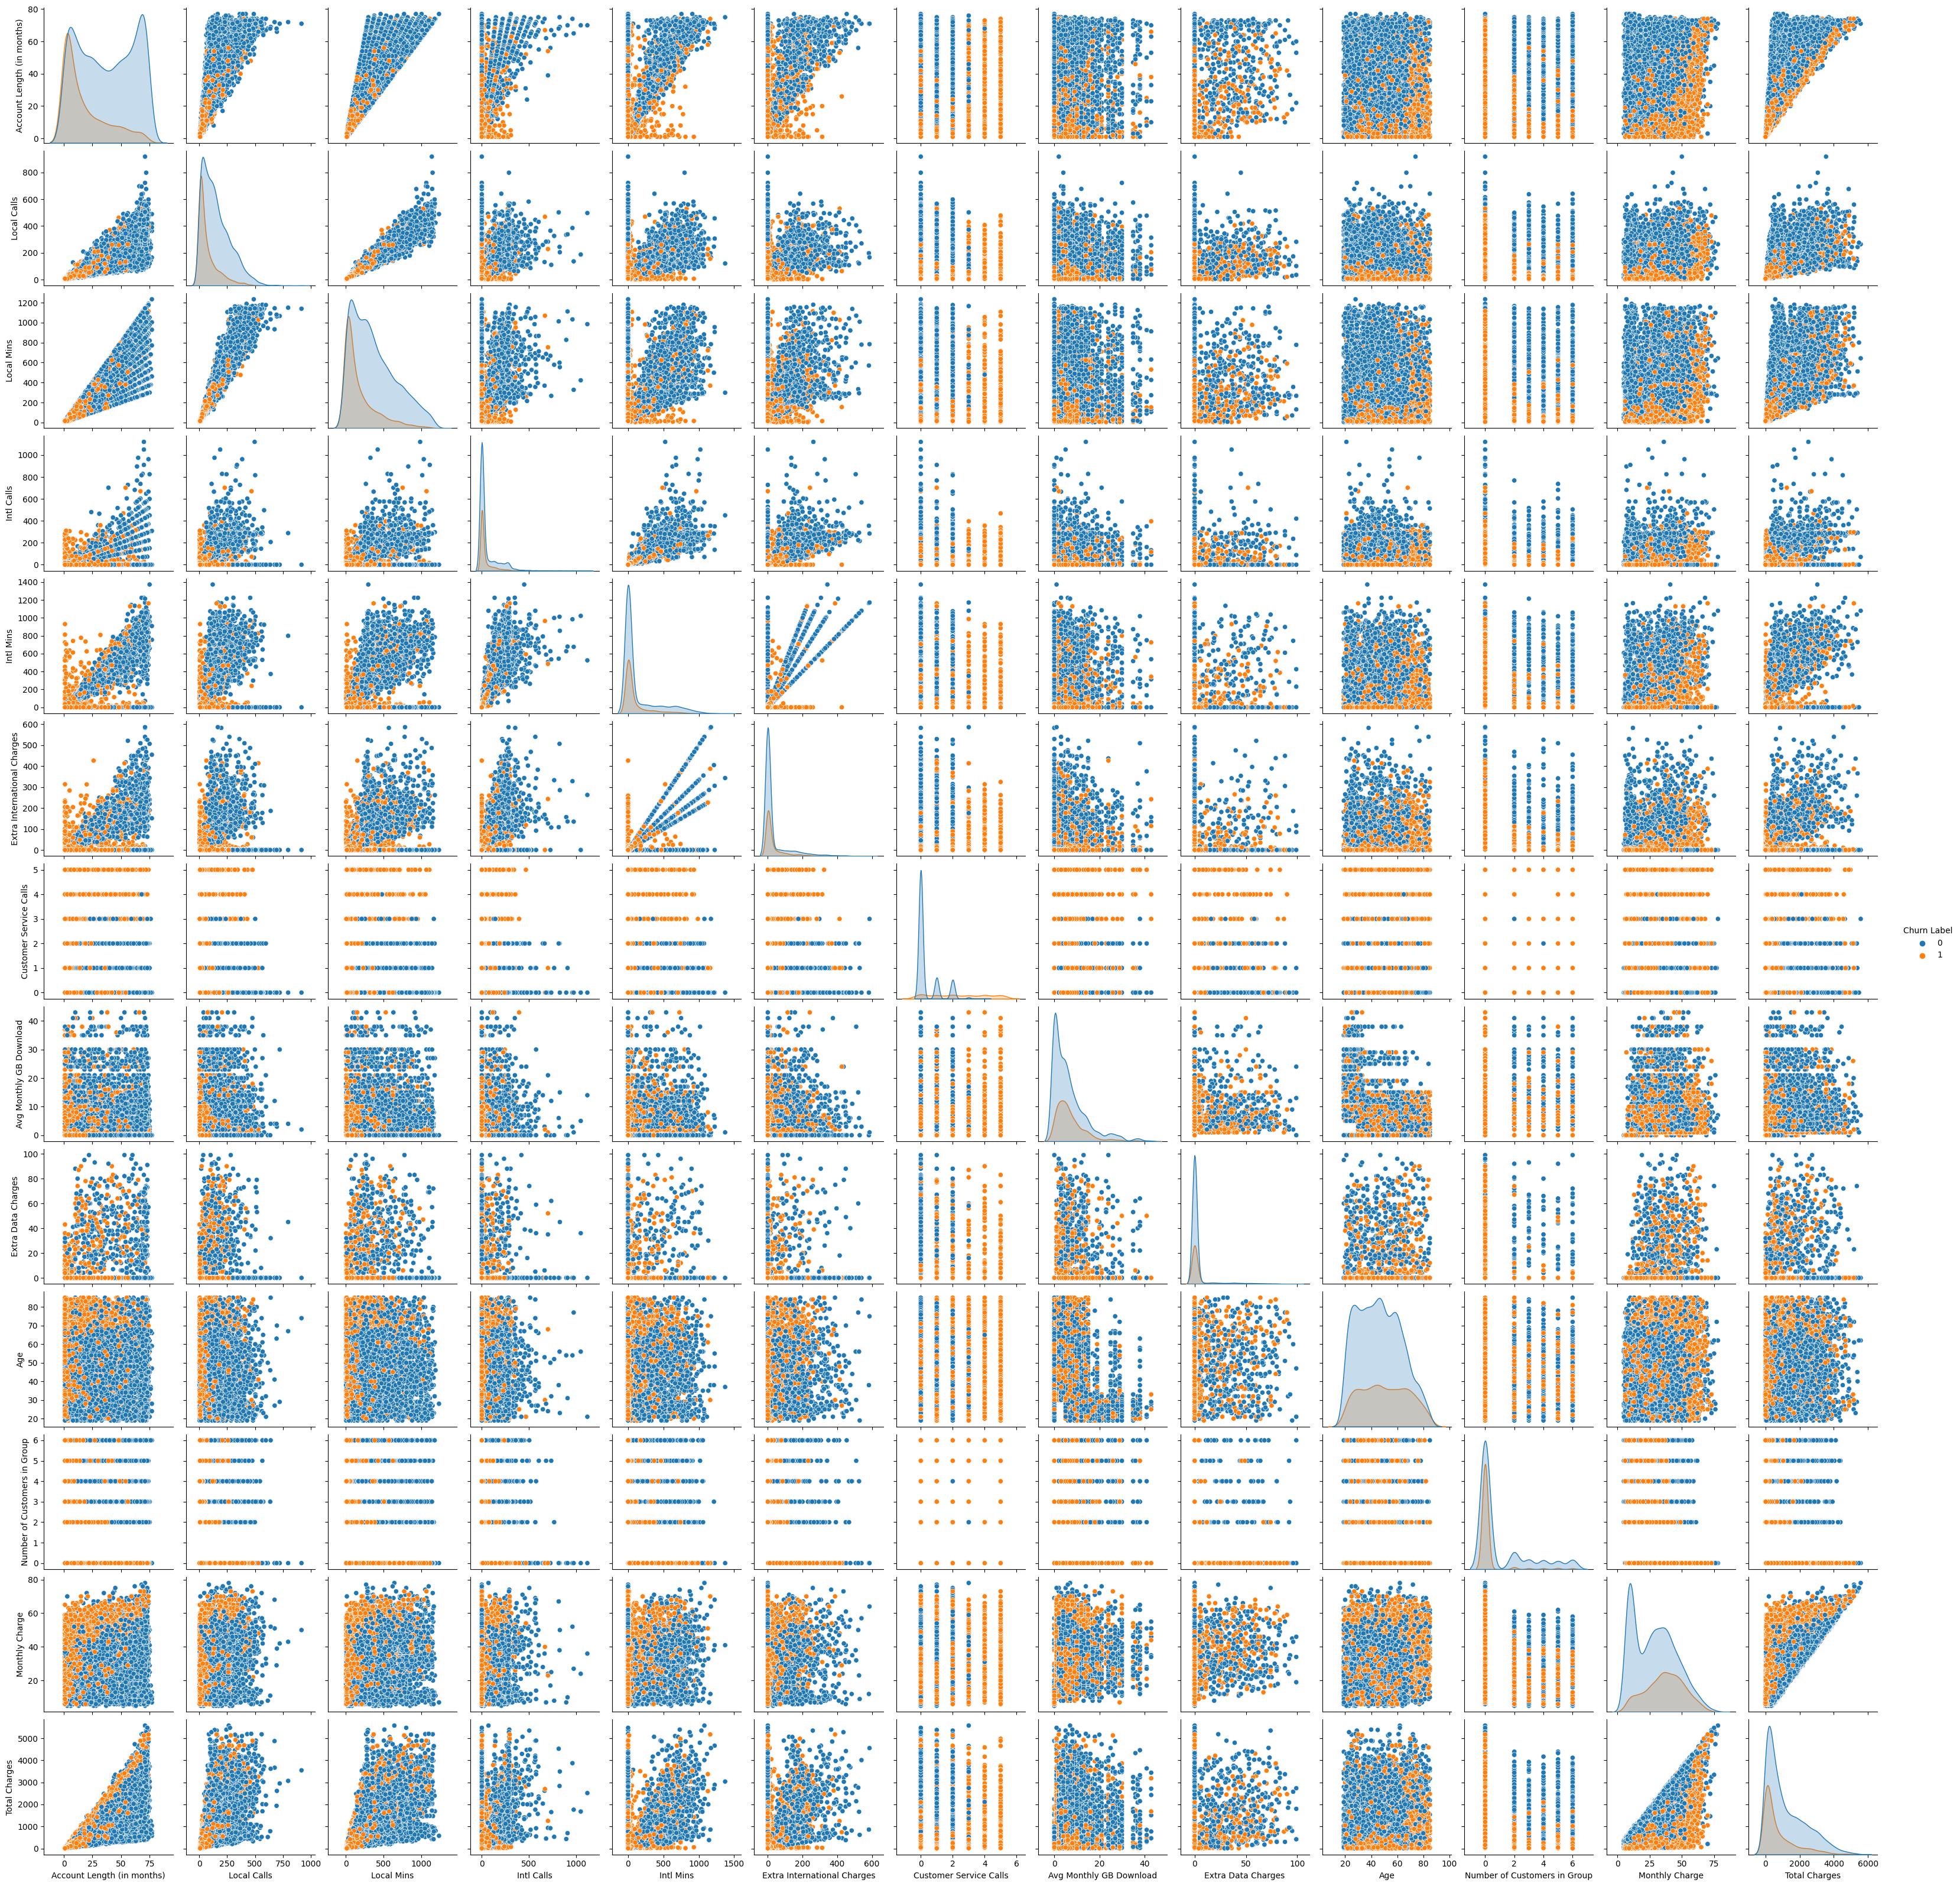

In [45]:
#draw pairplot to know data is linear or not
sns.pairplot(copy_churn_data, hue='Churn Label')
plt.show()

In [47]:
#get information about data
copy_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6687 entries, 0 to 6686
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        6687 non-null   object 
 1   Churn Label                        6687 non-null   int64  
 2   Account Length (in months)         6687 non-null   int64  
 3   Local Calls                        6687 non-null   int64  
 4   Local Mins                         6687 non-null   float64
 5   Intl Calls                         6687 non-null   float64
 6   Intl Mins                          6687 non-null   float64
 7   Intl Active                        6687 non-null   object 
 8   Intl Plan                          6687 non-null   object 
 9   Extra International Charges        6687 non-null   float64
 10  Customer Service Calls             6687 non-null   int64  
 11  Avg Monthly GB Download            6687 non-null   int64

In [48]:
'''drop columns(customer ID, it is not important fot prediction, Under 30 & Senior Age column represents them,Monthly Charge total charges is existed instead of it,
group there is Number of Customers in Group which represents it, Churn Category,Churn Reason ti prevent data leakage, State & Phone Number they aren't important for prediction  )'''
copy_churn_data.drop(columns=['Customer ID','Under 30','Senior','Monthly Charge','Group','Churn Category','Churn Reason','State','Phone Number'],inplace=True)


In [49]:
copy_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6687 entries, 0 to 6686
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Churn Label                        6687 non-null   int64  
 1   Account Length (in months)         6687 non-null   int64  
 2   Local Calls                        6687 non-null   int64  
 3   Local Mins                         6687 non-null   float64
 4   Intl Calls                         6687 non-null   float64
 5   Intl Mins                          6687 non-null   float64
 6   Intl Active                        6687 non-null   object 
 7   Intl Plan                          6687 non-null   object 
 8   Extra International Charges        6687 non-null   float64
 9   Customer Service Calls             6687 non-null   int64  
 10  Avg Monthly GB Download            6687 non-null   int64  
 11  Unlimited Data Plan                6687 non-null   objec

In [50]:
# split featues and target
x=copy_churn_data.drop('Churn Label',axis=1)
y=copy_churn_data['Churn Label']

In [51]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Churn Label, dtype: int64

In [52]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6687 entries, 0 to 6686
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Account Length (in months)         6687 non-null   int64  
 1   Local Calls                        6687 non-null   int64  
 2   Local Mins                         6687 non-null   float64
 3   Intl Calls                         6687 non-null   float64
 4   Intl Mins                          6687 non-null   float64
 5   Intl Active                        6687 non-null   object 
 6   Intl Plan                          6687 non-null   object 
 7   Extra International Charges        6687 non-null   float64
 8   Customer Service Calls             6687 non-null   int64  
 9   Avg Monthly GB Download            6687 non-null   int64  
 10  Unlimited Data Plan                6687 non-null   object 
 11  Extra Data Charges                 6687 non-null   int64

In [53]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size = .75)

In [54]:
#encoding Intl Active
OHE_encoder1= OneHotEncoder(handle_unknown='ignore',sparse=False)
OHE_cols_train1 = pd.DataFrame(OHE_encoder1.fit_transform(X_train['Intl Active'].values.reshape(-1,1)))
OHE_cols_test1 = pd.DataFrame(OHE_encoder1.transform(X_test['Intl Active'].values.reshape(-1,1)))
OHE_cols_train1.index = X_train.index
OHE_cols_test1.index = X_test.index
num_X_train1 = X_train.drop('Intl Active', axis=1)
num_X_test1 = X_test.drop('Intl Active', axis=1)
OHE_X_train1 = pd.concat([num_X_train1, OHE_cols_train1], axis=1)
OHE_X_test1 = pd.concat([num_X_test1, OHE_cols_test1], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [55]:
OHE_X_train1.head()

Account Length (in months)  Local Calls  Local Mins  Intl Calls  \
5794                          28          152       367.9         0.0   
6017                           6           11        30.2         0.0   
3182                          52          226       721.9         0.0   
4677                           1            5        11.0         4.0   
4084                           1            4        10.0         5.0   

      Intl Mins Intl Plan  Extra International Charges  \
5794        0.0        no                          0.0   
6017        0.0        no                          0.0   
3182        0.0        no                          0.0   
4677       10.9        no                          3.6   
4084        8.5        no                          2.8   

      Customer Service Calls  Avg Monthly GB Download Unlimited Data Plan  \
5794                       0                        5                 Yes   
6017                       0                       15                 Yes   
3182                       1                       12                 Yes   
4677                       2                        2                 Yes   
4084                       2                        6                 Yes   

      Extra Data Charges  Gender  Age  Number of Customers in Group  \
5794                   0  Female   54                             4   
6017                   0  Female   22                             6   
3182                   0  Female   76                             0   
4677                   0  Female   40                             0   
4084                   0    Male   52                             0   

     Device Protection & Online Backup   Contract Type Payment Method  \
5794                                No        One Year   Direct Debit   
6017                                No  Month-to-Month   Direct Debit   
3182                                No        One Year   Direct Debit   
4677                                No  Month-to-Month    Paper Check   
4084                                No  Month-to-Month   Direct Debit   

      Total Charges    0    1  
5794            939  1.0  0.0  
6017             72  1.0  0.0  
3182           1965  1.0  0.0  
4677             32  0.0  1.0  
4084             22  0.0  1.0

In [56]:
column_name1 = OHE_encoder1.get_feature_names_out(['Intl Active'])
column_name1

array(['Intl Active_No', 'Intl Active_Yes'], dtype=object)

In [57]:
#rename columns after encoding
OHE_X_train1.rename(columns={0: "Intl Active No", 1: "Intl Active Yes"},inplace = True)
OHE_X_test1.rename(columns={0: "Intl Active No", 1: "Intl Active Yes"},inplace = True)

In [64]:
#encoding Unlimited Data Plan
OHE_encoder2= OneHotEncoder(handle_unknown='ignore',sparse=False)
OHE_cols_train2 = pd.DataFrame(OHE_encoder2.fit_transform(OHE_X_train1['Unlimited Data Plan'].values.reshape(-1,1)))
OHE_cols_test2 = pd.DataFrame(OHE_encoder2.transform(OHE_X_test1['Unlimited Data Plan'].values.reshape(-1,1)))
OHE_cols_train2.index = OHE_X_train1.index
OHE_cols_test2.index = OHE_X_test1.index
num_X_train2 = OHE_X_train1.drop('Unlimited Data Plan', axis=1)
num_X_test2 = OHE_X_test1.drop('Unlimited Data Plan', axis=1)
OHE_X_train2 = pd.concat([num_X_train2, OHE_cols_train2], axis=1)
OHE_X_test2 = pd.concat([num_X_test2, OHE_cols_test2], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [59]:
column_name2 = OHE_encoder2.get_feature_names_out(['Unlimited Data Plan'])
column_name2

array(['Unlimited Data Plan_No', 'Unlimited Data Plan_Yes'], dtype=object)

In [65]:
#rename columns after encoding
OHE_X_train2.rename(columns={0: "Unlimited Data Plan No", 1: "Unlimited Data Plan Yes"},inplace = True)
OHE_X_test2.rename(columns={0: "Unlimited Data Plan No", 1: "Unlimited Data Plan Yes"},inplace = True)

In [66]:
#encoding Gender Plan

OHE_encoder3= OneHotEncoder(handle_unknown='ignore',sparse=False)
OHE_cols_train3 = pd.DataFrame(OHE_encoder3.fit_transform(OHE_X_train2['Gender'].values.reshape(-1,1)))
OHE_cols_test3 = pd.DataFrame(OHE_encoder3.transform(OHE_X_test2['Gender'].values.reshape(-1,1)))
OHE_cols_train3.index = OHE_X_train2.index
OHE_cols_test3.index = OHE_X_test2.index
num_X_train3 = OHE_X_train2.drop('Gender', axis=1)
num_X_test3 = OHE_X_test2.drop('Gender', axis=1)
OHE_X_train3 = pd.concat([num_X_train3, OHE_cols_train3], axis=1)
OHE_X_test3 = pd.concat([num_X_test3, OHE_cols_test3], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [62]:
OHE_X_train3.head()

Account Length (in months)  Local Calls  Local Mins  Intl Calls  \
5794                          28          152       367.9         0.0   
6017                           6           11        30.2         0.0   
3182                          52          226       721.9         0.0   
4677                           1            5        11.0         4.0   
4084                           1            4        10.0         5.0   

      Intl Mins Intl Plan  Extra International Charges  \
5794        0.0        no                          0.0   
6017        0.0        no                          0.0   
3182        0.0        no                          0.0   
4677       10.9        no                          3.6   
4084        8.5        no                          2.8   

      Customer Service Calls  Avg Monthly GB Download  Extra Data Charges  \
5794                       0                        5                   0   
6017                       0                       15                   0   
3182                       1                       12                   0   
4677                       2                        2                   0   
4084                       2                        6                   0   

      Age  Number of Customers in Group Device Protection & Online Backup  \
5794   54                             4                                No   
6017   22                             6                                No   
3182   76                             0                                No   
4677   40                             0                                No   
4084   52                             0                                No   

       Contract Type Payment Method  Total Charges  Intl Active No  \
5794        One Year   Direct Debit            939             1.0   
6017  Month-to-Month   Direct Debit             72             1.0   
3182        One Year   Direct Debit           1965             1.0   
4677  Month-to-Month    Paper Check             32             0.0   
4084  Month-to-Month   Direct Debit             22             0.0   

      Intl Active Yes  Unlimited Data Plan No  Unlimited Data Plan Yes    0  \
5794              0.0                     0.0                      1.0  1.0   
6017              0.0                     0.0                      1.0  1.0   
3182              0.0                     0.0                      1.0  1.0   
4677              1.0                     0.0                      1.0  1.0   
4084              1.0                     0.0                      1.0  0.0   

        1    2  
5794  0.0  0.0  
6017  0.0  0.0  
3182  0.0  0.0  
4677  0.0  0.0  
4084  1.0  0.0

In [67]:
column_name3 = OHE_encoder3.get_feature_names_out(['Gender'])
column_name3

array(['Gender_Female', 'Gender_Male', 'Gender_Prefer not to say'],
      dtype=object)

In [68]:
#rename columns after encoding
OHE_X_train3.rename(columns={0: "Gender_Female", 1: "Gender_Male",2:"Gender_Prefer not to say"},inplace = True)
OHE_X_test3.rename(columns={0: "Gender_Female", 1: "Gender_Male", 2:"Gender_Prefer not to say"},inplace = True)

In [69]:
#encoding contact type
OHE_encoder4= OneHotEncoder(handle_unknown='ignore',sparse=False)
OHE_cols_train4 = pd.DataFrame(OHE_encoder4.fit_transform(OHE_X_train3['Contract Type'].values.reshape(-1,1)))
OHE_cols_test4 = pd.DataFrame(OHE_encoder4.transform(OHE_X_test3['Contract Type'].values.reshape(-1,1)))
OHE_cols_train4.index = OHE_X_train3.index
OHE_cols_test4.index = OHE_X_test3.index
num_X_train4 = OHE_X_train3.drop('Contract Type', axis=1)
num_X_test4 = OHE_X_test3.drop('Contract Type', axis=1)
OHE_X_train4 = pd.concat([num_X_train4, OHE_cols_train4], axis=1)
OHE_X_test4 = pd.concat([num_X_test4, OHE_cols_test4], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [70]:
column_name4 = OHE_encoder4.get_feature_names_out(['Contract Type'])
column_name4

array(['Contract Type_Month-to-Month', 'Contract Type_One Year',
       'Contract Type_Two Year'], dtype=object)

In [71]:
#rename columns after encoding
OHE_X_train4.rename(columns={0: "Contract Type_Month-to-Month", 1: "Contract Type_One Year",2:"Contract Type_Two Year"},inplace = True)
OHE_X_test4.rename(columns={0: "Contract Type_Month-to-Month", 1: "Contract Type_One Year", 2:"Contract Type_Two Year"},inplace = True)

In [72]:
#encoding payment method
OHE_encoder5= OneHotEncoder(handle_unknown='ignore',sparse=False)
OHE_cols_train5 = pd.DataFrame(OHE_encoder5.fit_transform(OHE_X_train4['Payment Method'].values.reshape(-1,1)))
OHE_cols_test5 = pd.DataFrame(OHE_encoder5.transform(OHE_X_test4['Payment Method'].values.reshape(-1,1)))
OHE_cols_train5.index = OHE_X_train4.index
OHE_cols_test5.index = OHE_X_test4.index
num_X_train5 = OHE_X_train4.drop('Payment Method', axis=1)
num_X_test5 = OHE_X_test4.drop('Payment Method', axis=1)
OHE_X_train5 = pd.concat([num_X_train5, OHE_cols_train5], axis=1)
OHE_X_test5 = pd.concat([num_X_test5, OHE_cols_test5], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [73]:
column_name5 = OHE_encoder5.get_feature_names_out(['Payment Method'])
column_name5

array(['Payment Method_Credit Card', 'Payment Method_Direct Debit',
       'Payment Method_Paper Check'], dtype=object)

In [74]:
#rename columns after encoding

OHE_X_train5.rename(columns={0: "Payment Method_Credit Card", 1: "Payment Method_Direct Debit",2:"Payment Method_Paper Check"},inplace = True)
OHE_X_test5.rename(columns={0: "Payment Method_Credit Card", 1: "Payment Method_Direct Debit", 2:"Payment Method_Paper Check"},inplace = True)

In [75]:
#encoding Intl Plan
OHE_encoder6= OneHotEncoder(handle_unknown='ignore',sparse=False)
OHE_cols_train6 = pd.DataFrame(OHE_encoder6.fit_transform(OHE_X_train5['Intl Plan'].values.reshape(-1,1)))
OHE_cols_test6 = pd.DataFrame(OHE_encoder6.transform(OHE_X_test5['Intl Plan'].values.reshape(-1,1)))
OHE_cols_train6.index = OHE_X_train5.index
OHE_cols_test6.index = OHE_X_test5.index
num_X_train6 = OHE_X_train5.drop('Intl Plan', axis=1)
num_X_test6 = OHE_X_test5.drop('Intl Plan', axis=1)
OHE_X_train6 = pd.concat([num_X_train6, OHE_cols_train6], axis=1)
OHE_X_test6 = pd.concat([num_X_test6, OHE_cols_test6], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [76]:
column_name6 = OHE_encoder6.get_feature_names_out(['Intl Plan'])
column_name6

array(['Intl Plan_no', 'Intl Plan_yes'], dtype=object)

In [77]:
#rename columns after encoding

OHE_X_train6.rename(columns={0: "Intl Plan_no", 1: "Intl Plan_yes"},inplace = True)
OHE_X_test6.rename(columns={0: "Intl Plan_no", 1: "Intl Plan_yes"},inplace = True)

In [79]:
#encoding Device Protection & Online Backup
OHE_encoder7= OneHotEncoder(handle_unknown='ignore',sparse=False)
OHE_cols_train7 = pd.DataFrame(OHE_encoder7.fit_transform(OHE_X_train5['Device Protection & Online Backup'].values.reshape(-1,1)))
OHE_cols_test7 = pd.DataFrame(OHE_encoder7.transform(OHE_X_test5['Device Protection & Online Backup'].values.reshape(-1,1)))
OHE_cols_train7.index = OHE_X_train6.index
OHE_cols_test7.index = OHE_X_test6.index
num_X_train7 = OHE_X_train6.drop('Device Protection & Online Backup', axis=1)
num_X_test7 = OHE_X_test6.drop('Device Protection & Online Backup', axis=1)
OHE_X_train7 = pd.concat([num_X_train7, OHE_cols_train7], axis=1)
OHE_X_test7 = pd.concat([num_X_test7, OHE_cols_test7], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [80]:
column_name7 = OHE_encoder7.get_feature_names_out(['Device Protection & Online Backup'])
column_name7

array(['Device Protection & Online Backup_No',
       'Device Protection & Online Backup_Yes'], dtype=object)

In [81]:
#rename columns after encoding

OHE_X_train7.rename(columns={0: "Device Protection & Online Backup_No", 1: "Device Protection & Online Backup_Yes"},inplace = True)
OHE_X_test7.rename(columns={0: "Device Protection & Online Backup_No", 1: "Device Protection & Online Backup_Yes"},inplace = True)

In [83]:
#scaling
scaler = StandardScaler()

In [85]:
#scaling data
xtrain_scaled = scaler.fit_transform(OHE_X_train7)
xtest_scaled = scaler.transform(OHE_X_test7)

In [87]:
OHE_X_test7.head()

Account Length (in months)  Local Calls  Local Mins  Intl Calls  \
3471                          37           86       222.9         0.0   
5695                          20           39       120.9         0.0   
5839                          23           87       185.8         0.0   
729                           41          314       651.1         0.0   
2608                          62          167       374.9         0.0   

      Intl Mins  Extra International Charges  Customer Service Calls  \
3471        0.0                          0.0                       0   
5695        0.0                          0.0                       0   
5839        0.0                          0.0                       0   
729         0.0                          0.0                       0   
2608        0.0                          0.0                       0   

      Avg Monthly GB Download  Extra Data Charges  Age  \
3471                        0                   0   36   
5695                        0                   0   46   
5839                        9                   0   27   
729                         0                   0   24   
2608                        3                   0   82   

      Number of Customers in Group  Total Charges  Intl Active No  \
3471                             0            241             1.0   
5695                             5            205             1.0   
5839                             4            681             1.0   
729                              0            512             1.0   
2608                             0           2793             1.0   

      Intl Active Yes  Unlimited Data Plan No  Unlimited Data Plan Yes  \
3471              0.0                     1.0                      0.0   
5695              0.0                     1.0                      0.0   
5839              0.0                     0.0                      1.0   
729               0.0                     1.0                      0.0   
2608              0.0                     0.0                      1.0   

      Gender_Female  Gender_Male  Gender_Prefer not to say  \
3471            0.0          1.0                       0.0   
5695            0.0          1.0                       0.0   
5839            0.0          1.0                       0.0   
729             1.0          0.0                       0.0   
2608            0.0          1.0                       0.0   

      Contract Type_Month-to-Month  Contract Type_One Year  \
3471                           0.0                     0.0   
5695                           1.0                     0.0   
5839                           1.0                     0.0   
729                            0.0                     0.0   
2608                           0.0                     1.0   

      Contract Type_Two Year  Payment Method_Credit Card  \
3471                     1.0                         1.0   
5695                     0.0                         1.0   
5839                     0.0                         0.0   
729                      1.0                         0.0   
2608                     0.0                         1.0   

      Payment Method_Direct Debit  Payment Method_Paper Check  Intl Plan_no  \
3471                          0.0                         0.0           1.0   
5695                          0.0                         0.0           1.0   
5839                          1.0                         0.0           1.0   
729                           1.0                         0.0           1.0   
2608                          0.0                         0.0           1.0   

      Intl Plan_yes  Device Protection & Online Backup_No  \
3471            0.0                                   1.0   
5695            0.0                                   1.0   
5839            0.0                                   1.0   
729             0.0                                   1.0   
2608            0.0                   

In [88]:
mi_score = MIC(xtrain_scaled,y_train)
print(mi_score)

[0.07216978 0.05867315 0.06303273 0.05288781 0.05545497 0.07715996
 0.21124631 0.03521629 0.0092067  0.01292405 0.02894735 0.03027145
 0.01044349 0.01067153 0.02161223 0.03069161 0.00651686 0.
 0.00662137 0.11563925 0.01616117 0.07025369 0.02106658 0.0127678
 0.         0.         0.00304341 0.00486548 0.0074492 ]


In [90]:
#MI score for features after encoding
mutual_info = pd.Series(mi_score)
mutual_info.index = OHE_X_train7.columns
mutual_info.sort_values(ascending=False)

Customer Service Calls                   0.211246
Contract Type_Month-to-Month             0.115639
Extra International Charges              0.077160
Account Length (in months)               0.072170
Contract Type_Two Year                   0.070254
Local Mins                               0.063033
Local Calls                              0.058673
Intl Mins                                0.055455
Intl Calls                               0.052888
Avg Monthly GB Download                  0.035216
Unlimited Data Plan Yes                  0.030692
Total Charges                            0.030271
Number of Customers in Group             0.028947
Unlimited Data Plan No                   0.021612
Payment Method_Credit Card               0.021067
Contract Type_One Year                   0.016161
Age                                      0.012924
Payment Method_Direct Debit              0.012768
Intl Active Yes                          0.010672
Intl Active No                           0.010443


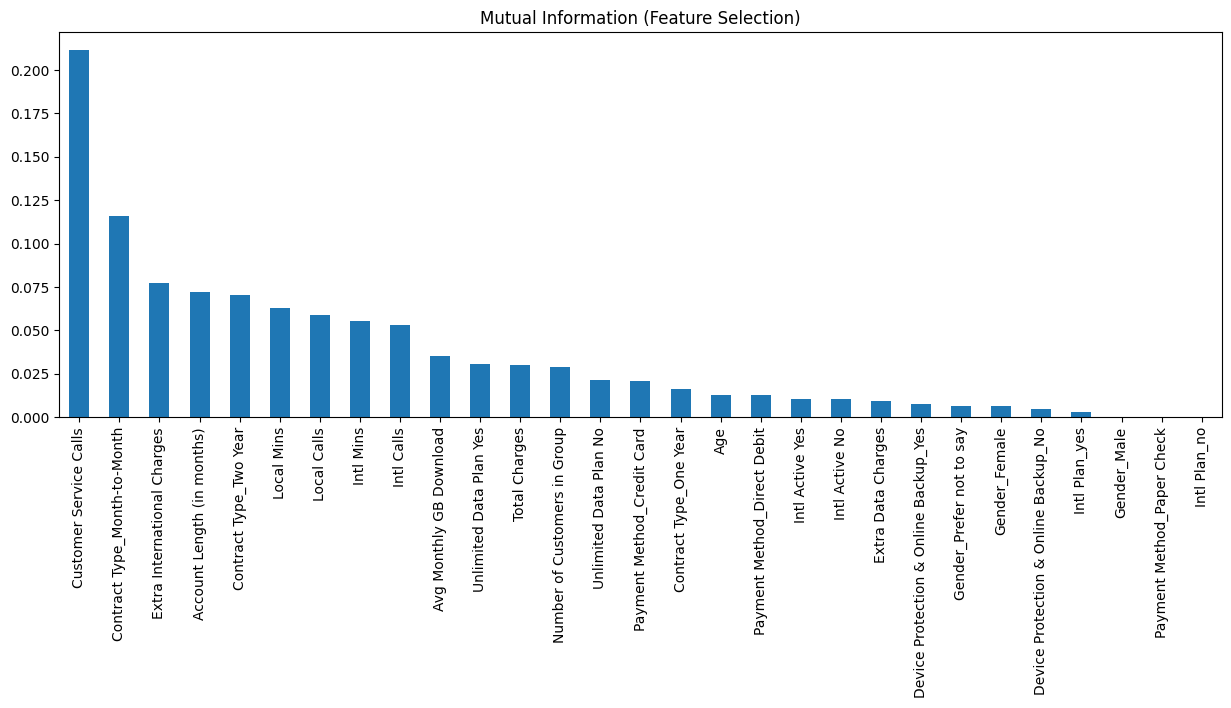

In [93]:
#present MI in a columnc chart
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15, 5))
plt.title("Mutual Information (Feature Selection)")
plt.show();

In [95]:
#feature selection
from sklearn.feature_selection import SelectKBest
sel_seven_cols = SelectKBest(MIC, k=7)
sel_seven_cols.fit(xtrain_scaled, y_train)
OHE_X_train7.columns[sel_seven_cols.get_support()]

Index(['Account Length (in months)', 'Local Calls', 'Local Mins',
       'Extra International Charges', 'Customer Service Calls',
       'Contract Type_Month-to-Month', 'Contract Type_Two Year'],
      dtype='object')

In [103]:
#split best 7 columns of train dataframe for prediction
sel_seven_train=xtrain_scaled[:,[6,19,21,5,2,0,3]]

In [104]:
#shape of train dataframe for prediction
sel_seven_train.shape

(5015, 7)

In [105]:
#split best 7 columns of test dataframe for prediction

sel_seven_test=xtest_scaled[:,[6,19,21,5,2,0,3]]

In [106]:
#Modeling random forest tree for classification
#import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

rf = RandomForestClassifier(max_depth=4)
rf.fit(sel_seven_train, y_train)
y_pred = rf.predict(sel_seven_test)
y_train_pred= rf.predict(sel_seven_train)

In [108]:
#get accuracy, precision, recall of test
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.8690191387559809
Precision: 0.8859060402684564
Recall: 0.5879732739420935


In [110]:
#get accuracy, precision, recall of train

accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train= precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)

print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)

Accuracy: 0.8801595214356929
Precision: 0.9010752688172043
Recall: 0.6221232368225686


In [111]:
#print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1223
           1       0.89      0.59      0.71       449

    accuracy                           0.87      1672
   macro avg       0.88      0.78      0.81      1672
weighted avg       0.87      0.87      0.86      1672



In [112]:
#print classification report

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      3668
           1       0.90      0.62      0.74      1347

    accuracy                           0.88      5015
   macro avg       0.89      0.80      0.83      5015
weighted avg       0.88      0.88      0.87      5015



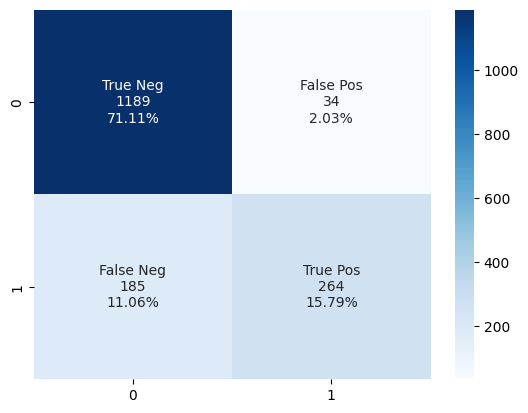

In [113]:
#visualize confusion_matrix of test data

cm=confusion_matrix(y_test,y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.show()

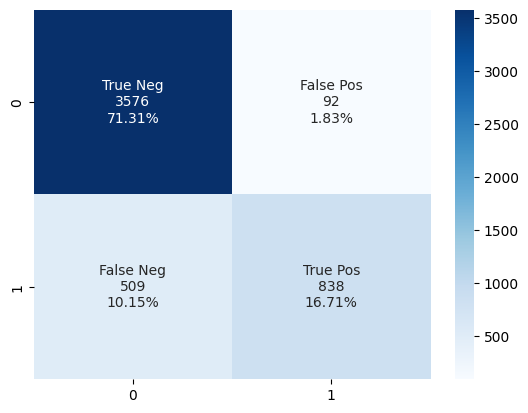

In [114]:
#visualize confusion_matrix of train data
cm_random=confusion_matrix(y_train, y_train_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm_random.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm_random.flatten()/np.sum(cm_random)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_random, annot=labels, fmt='', cmap='Blues')
plt.show()

In [115]:
#Adaboost algorithm
adaboost_trial = AdaBoostClassifier(random_state=42)


adaboost_trial.fit(sel_seven_train, y_train)
y_adaboost_predict = adaboost_trial.predict(sel_seven_test)

y_adaboost_train=adaboost_trial.predict(sel_seven_train)

In [118]:
#get accuracy, precision, recall of test

accuracy1 = accuracy_score(y_test, y_adaboost_predict)
precision1 = precision_score(y_test, y_adaboost_predict)
recall1 = recall_score(y_test, y_adaboost_predict)

print("Accuracy:", accuracy1)
print("Precision:", precision1)
print("Recall:", recall1)


Accuracy: 0.8732057416267942
Precision: 0.8356940509915014
Recall: 0.6570155902004454


In [119]:
#get accuracy, precision, recall of train
accuracy2 = accuracy_score(y_train, y_adaboost_train)
precision2 = precision_score(y_train, y_adaboost_train)
recall2 = recall_score(y_train, y_adaboost_train)

print("Accuracy:", accuracy2)
print("Precision:", precision2)
print("Recall:", recall2)


Accuracy: 0.8831505483549352
Precision: 0.8559401309635173
Recall: 0.6792873051224945


In [120]:
#print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_adaboost_predict))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1223
           1       0.84      0.66      0.74       449

    accuracy                           0.87      1672
   macro avg       0.86      0.80      0.83      1672
weighted avg       0.87      0.87      0.87      1672



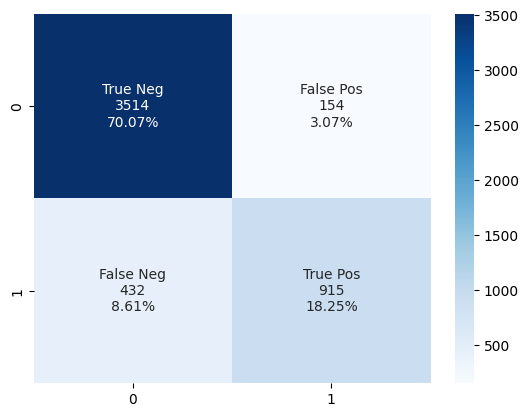

In [126]:
#visualize confusion matrix of train data
cm1=confusion_matrix(y_train,y_adaboost_train)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm1.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm1.flatten()/np.sum(cm1)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm1, annot=labels, fmt='', cmap='Blues')
plt.show()

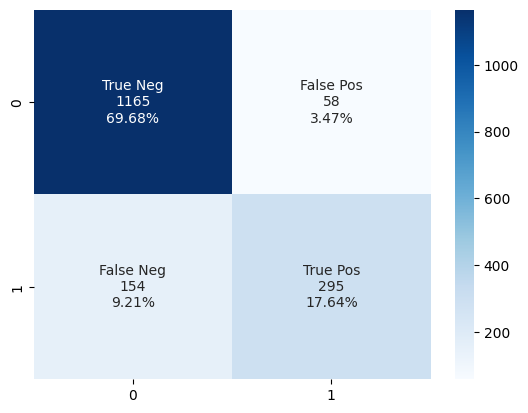

In [125]:
#visualize confusion_matrix of test data

cm2=confusion_matrix(y_test,y_adaboost_predict)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm2.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm2.flatten()/np.sum(cm2)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm2, annot=labels, fmt='', cmap='Blues')
plt.show()